# Lab2

In [40]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats
from sklearn.preprocessing import scale
from tabulate import tabulate
from sklearn.decomposition import FactorAnalysis
from lab1.brazil import make_dataset
import warnings

warnings.filterwarnings(action='ignore')

In [4]:
def prepare_df(df):
    abbreviation = ['date','hour','prcp', 'stp', 'smax', 'smin','gbrd','temp','dewp','tmax','tmin','dmax','dmin','hmax','hmin','hmdy','wdct', 'gust', 'wdsp', 'regi','prov','wsnm','inme','lat','lon','elvt']
    
    df.drop(['index'],inplace=True, axis=1)
    df.columns = abbreviation
    df = make_dataset.clean_na(df)
    df['date_time'] = pd.to_datetime(df['date'] + ' ' +  df['hour'])
    df.drop(['date','hour'], inplace=True, axis=1)

    return df

In [6]:
df = pd.read_csv('south.csv', engine='python')
df = prepare_df(df)
df.dropna(inplace=True)
sample = df[['stp','dewp','hmdy','wdsp','gbrd','prcp','temp']]
sample.head(10)

,stp,dewp,hmdy,wdsp,gbrd,prcp,temp
10,1015.7,12.1,86.0,1.8,61.0,0.0,14.4
11,1016.3,12.6,84.0,2.2,508.0,0.0,15.3
12,1017.0,12.4,76.0,2.2,1553.0,0.0,16.6
13,1017.4,10.6,62.0,2.3,2312.0,0.0,17.9
14,1016.9,7.6,49.0,1.6,2828.0,0.0,18.6
15,1016.3,7.4,45.0,1.7,3228.0,0.0,19.5
16,1015.7,7.6,45.0,1.2,2220.0,0.0,19.8
17,1014.7,8.1,44.0,1.7,3079.0,0.0,20.9
18,1014.1,6.9,40.0,1.1,2791.0,0.0,20.9
19,1014.0,7.4,42.0,1.7,1924.0,0.0,20.9


In [7]:
sample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19990 entries, 10 to 19999
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   stp     19990 non-null  float64
 1   dewp    19990 non-null  float64
 2   hmdy    19990 non-null  float64
 3   wdsp    19990 non-null  float64
 4   gbrd    19990 non-null  float64
 5   prcp    19990 non-null  float64
 6   temp    19990 non-null  float64
dtypes: float64(7)
memory usage: 1.2 MB


### Task 1

A non-parametric estimation of PDF in form of histogram and using
kernel density function for MRV (or probability law in case of discrete MRV).

[Text(0.5, 0, 'Precipitation')]

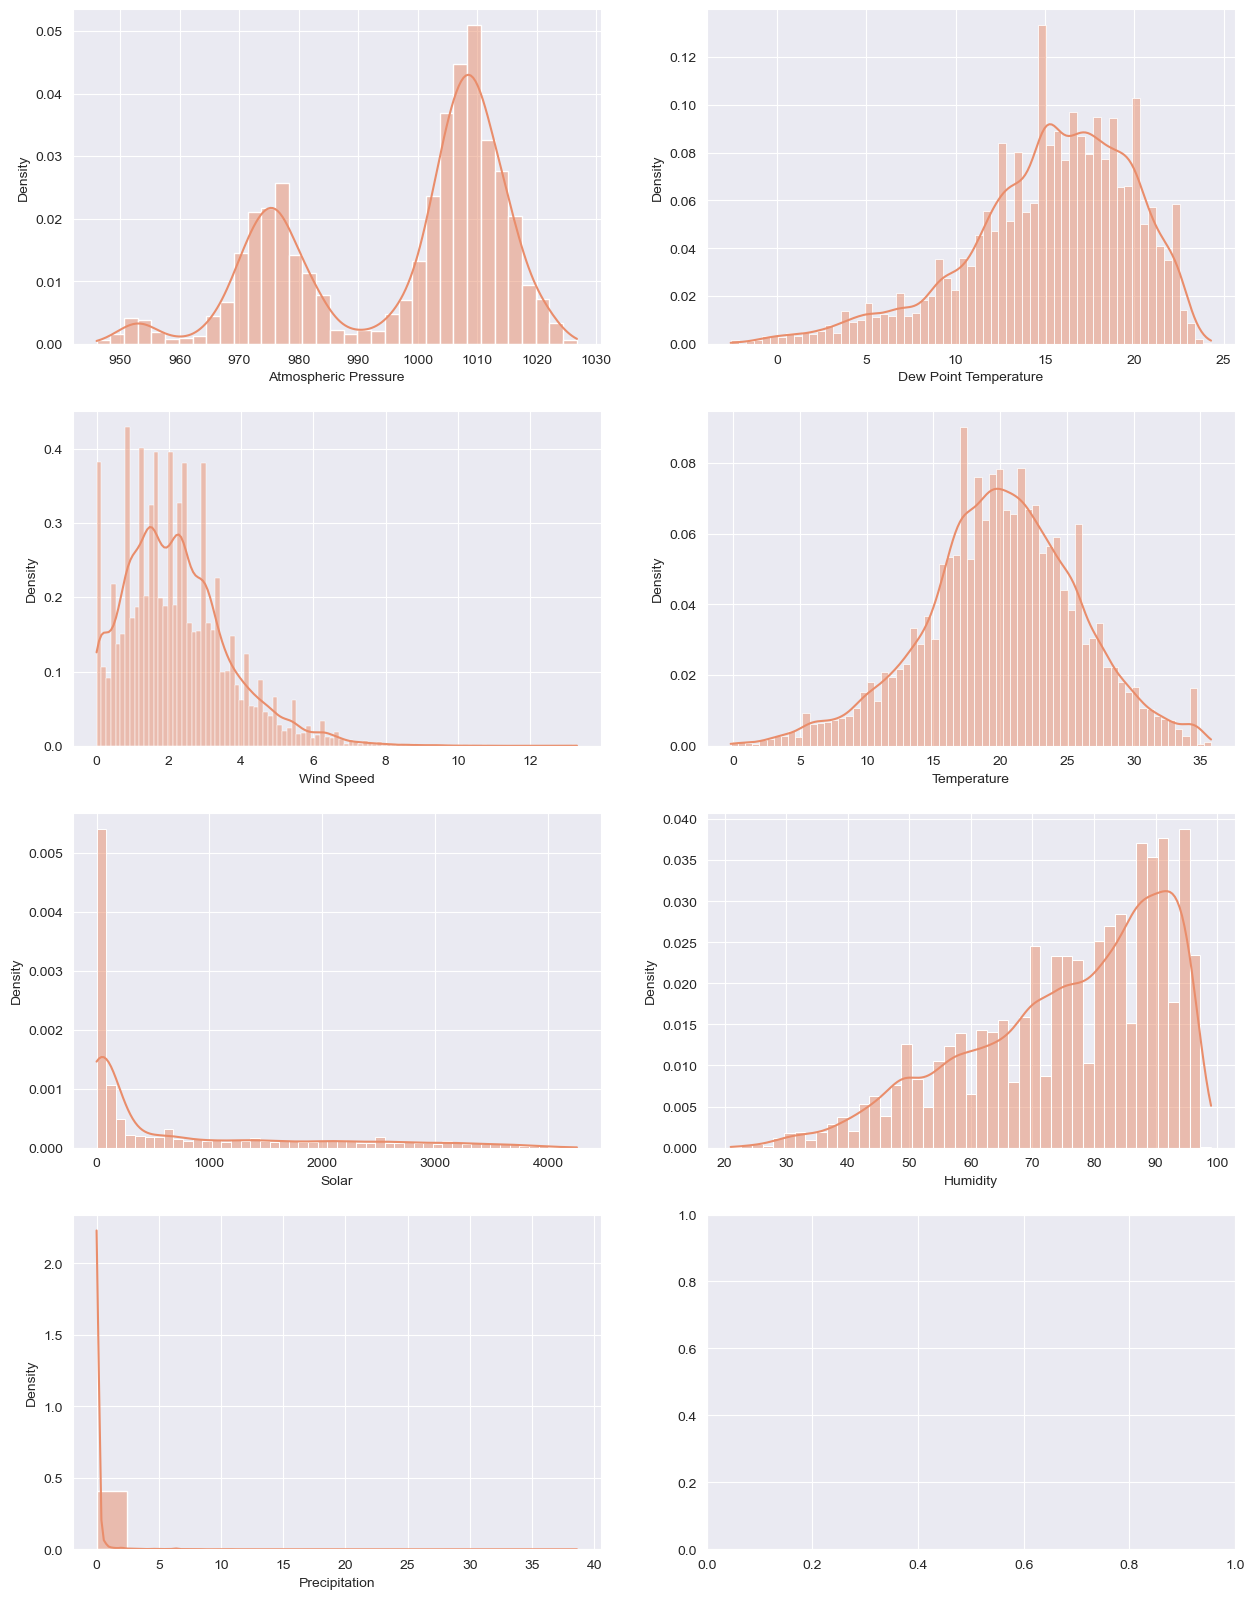

In [8]:
figure, ax = plt.subplots(4, 2, figsize=(15, 20))

sns.set_theme(style='whitegrid', palette="flare")

stp = sns.histplot(sample.stp, ax=ax[0, 0], kde=True, stat='density')
stp.set(xlabel='Atmospheric Pressure')

dewp = sns.histplot(sample.dewp, ax=ax[0, 1], kde=True, stat='density')
dewp.set(xlabel='Dew Point Temperature')

wdsp = sns.histplot(sample.wdsp, ax=ax[1, 0], kde=True, stat='density')
wdsp.set(xlabel='Wind Speed')

temp = sns.histplot(sample.temp, ax=ax[1, 1], kde=True, stat='density')
temp.set(xlabel='Temperature')

gbrd = sns.histplot(sample.gbrd, ax=ax[2, 0], kde=True, stat='density')
gbrd.set(xlabel='Solar')

hmdy = sns.histplot(sample.hmdy, ax=ax[2, 1], kde=True, stat='density')
hmdy.set(xlabel='Humidity')

prcp = sns.histplot(sample.prcp, ax=ax[3, 0], kde=True, stat='density')
prcp.set(xlabel='Precipitation')

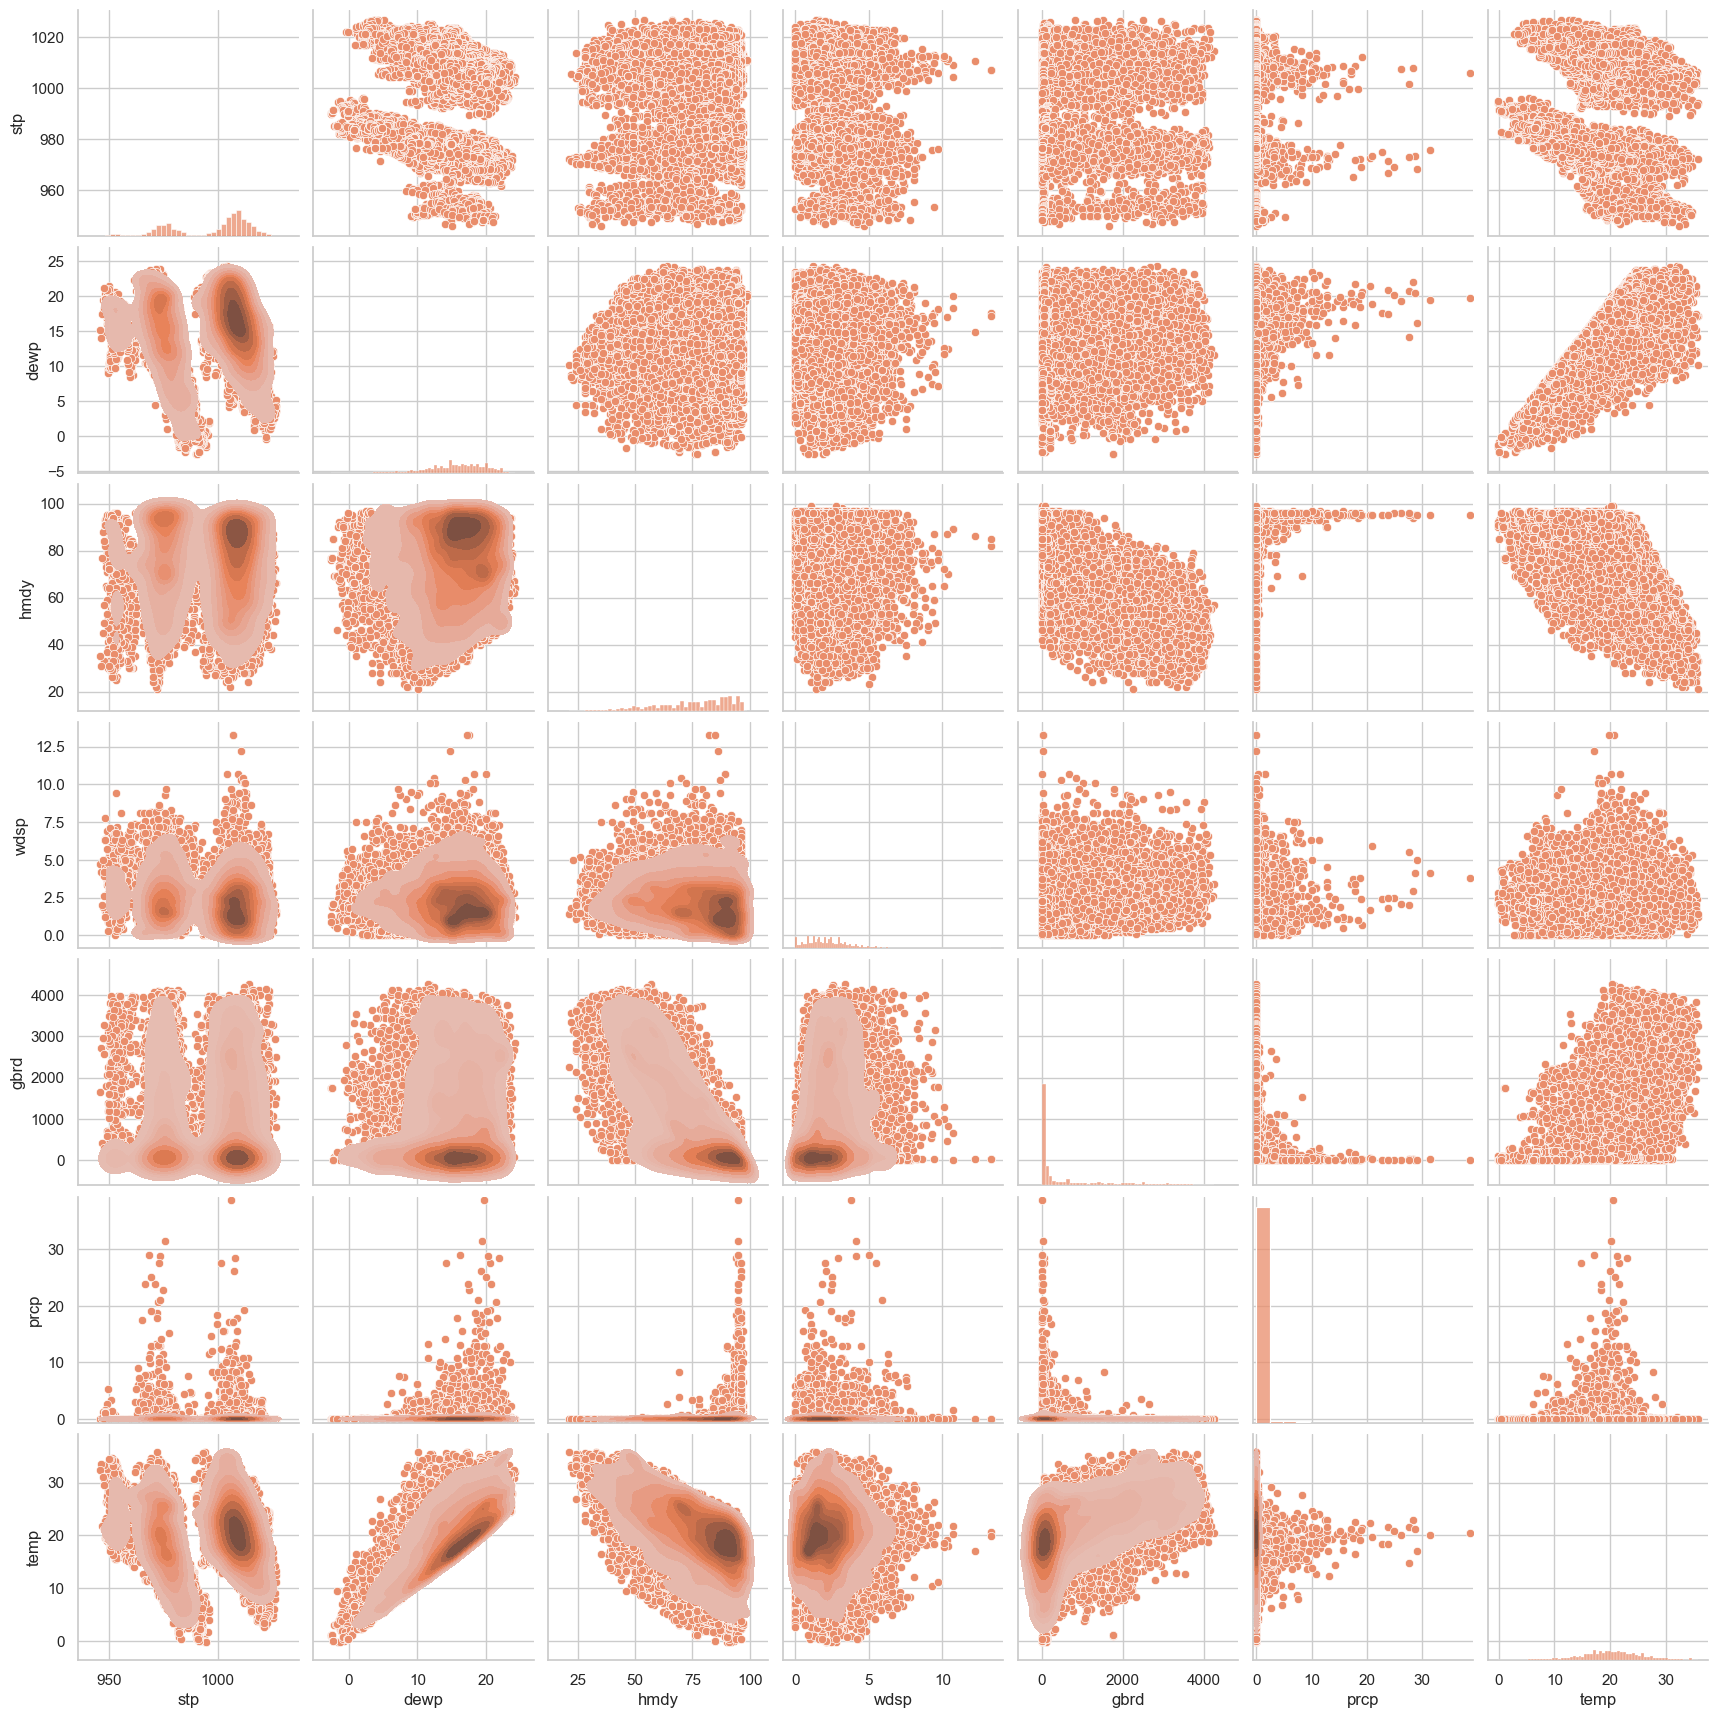

In [9]:
sns.set_theme(style='whitegrid', palette='flare')
ax = sns.pairplot(sample, diag_kind='hist')
ax.map_lower(sns.kdeplot, fill=True)
plt.show()

### Task 2
An estimation of multivariate mathematical expectation and
variance.

In [10]:
sample.mean()

stp     996.830865
dewp     15.239115
hmdy     75.778839
wdsp      2.230305
gbrd    727.408054
prcp      0.177839
temp     20.080860
dtype: float64

In [11]:
sample.var()

stp     3.243302e+02
dewp    2.201188e+01
hmdy    2.527375e+02
wdsp    2.164595e+00
gbrd    1.098550e+06
prcp    1.440688e+00
temp    3.460612e+01
dtype: float64

### Task 3
A non-parametric estimation of conditional distributions,
mathematical expectations and variances.

In [12]:
cond_sample = sample[sample.temp > 25]
cond_sample.head(10)

,stp,dewp,hmdy,wdsp,gbrd,prcp,temp
40,1003.8,14.8,51.0,1.0,3117.0,0.0,25.6
41,1002.3,15.2,49.0,0.7,2880.0,0.0,26.9
42,1001.0,15.6,51.0,0.4,1521.0,0.0,26.5
160,1015.5,8.7,34.0,1.3,3250.0,0.0,25.5
161,1014.5,9.7,34.0,1.1,3017.0,0.0,26.8
162,1013.8,11.0,38.0,2.3,2566.0,0.0,26.5
163,1013.4,13.1,46.0,2.5,1955.0,0.0,25.4
183,1014.6,13.4,46.0,0.9,3110.0,0.0,26.0
184,1014.0,15.6,52.0,2.4,3132.0,0.0,26.1
185,1013.3,15.2,53.0,2.6,2980.0,0.0,25.3


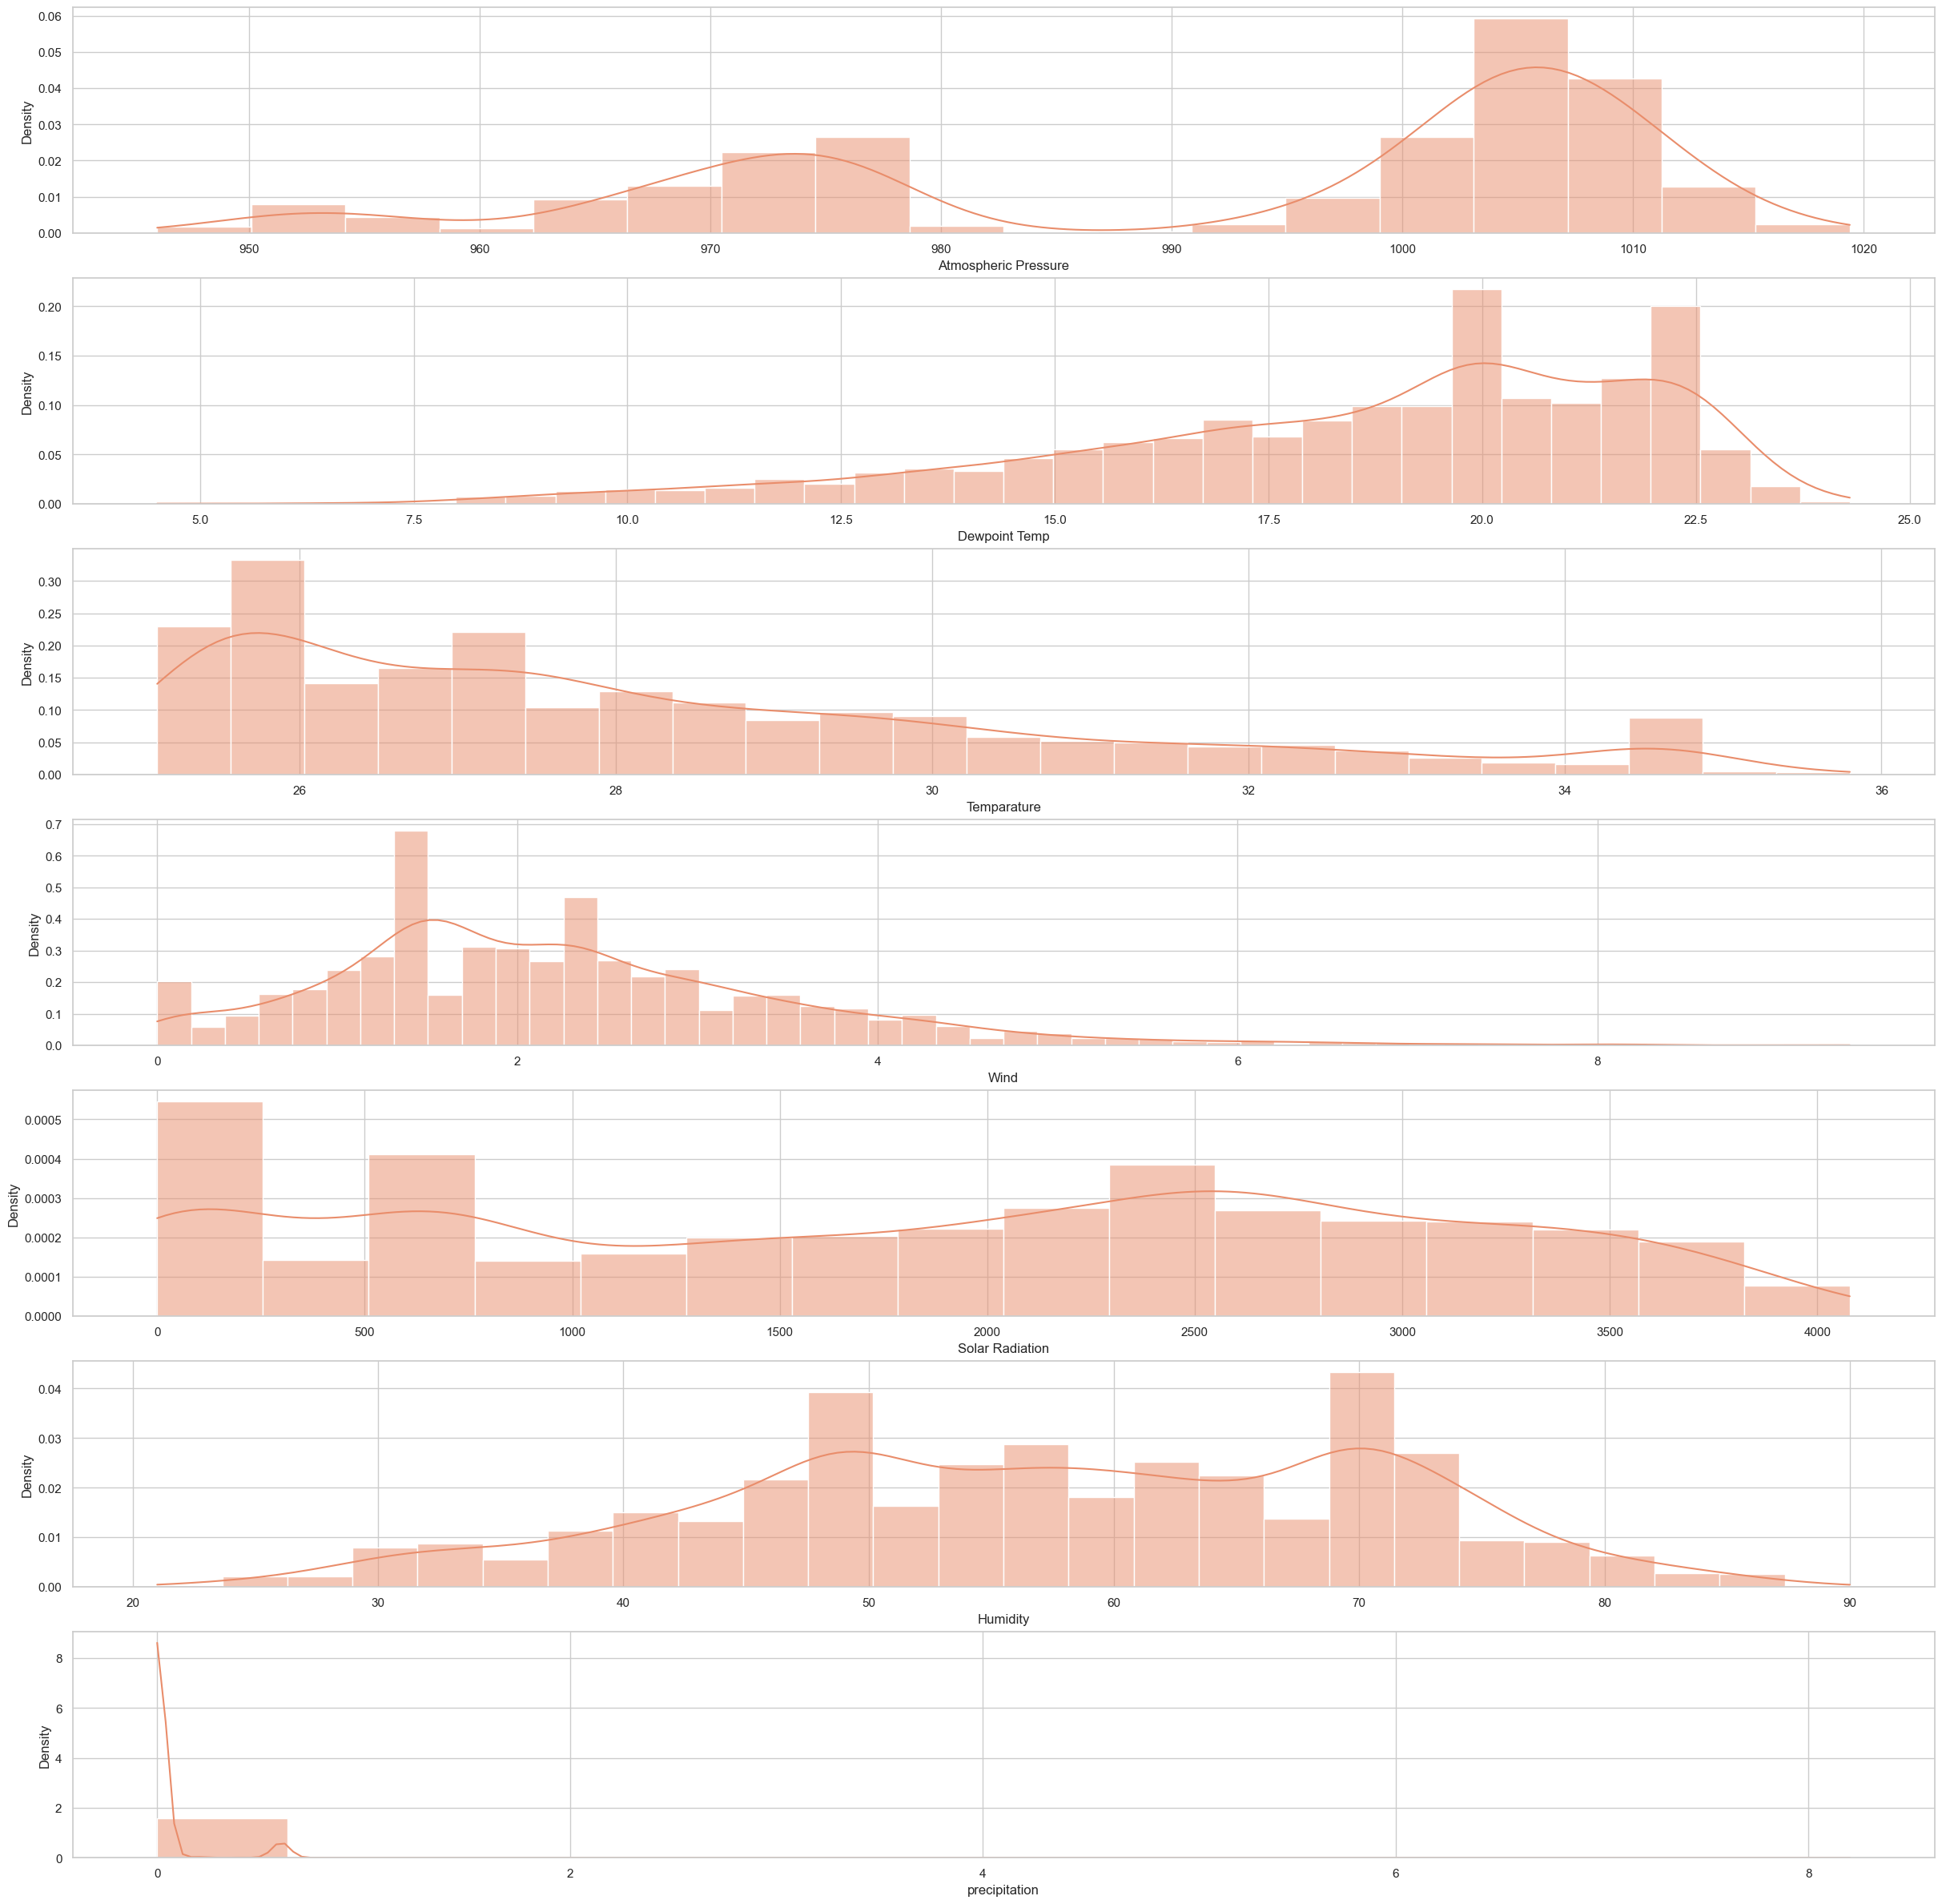

In [13]:
figure, ax = plt.subplots(7, 1, figsize=(30, 30))
sns.set_theme(style='whitegrid', palette='flare')

stp = sns.histplot(cond_sample.stp, ax=ax[0,], kde=True, stat='density')
stp.set(xlabel='Atmospheric Pressure')

dewp = sns.histplot(cond_sample.dewp, ax=ax[1, ], kde=True, stat='density')
dewp.set(xlabel='Dewpoint Temp')

temp = sns.histplot(cond_sample.temp, ax=ax[2, ], kde=True, stat='density')
temp.set(xlabel='Temparature')

wdsp = sns.histplot(cond_sample.wdsp, ax=ax[3, ], kde=True, stat='density')
wdsp.set(xlabel='Wind')

gbrd = sns.histplot(cond_sample.gbrd, ax=ax[4, ], kde=True, stat='density')
gbrd.set(xlabel='Solar Radiation')

hmdy = sns.histplot(cond_sample.hmdy, ax=ax[5, ], kde=True, stat='density')
hmdy.set(xlabel='Humidity')

prcp = sns.histplot(cond_sample.prcp, ax=ax[6, ], kde=True, stat='density')
prcp.set(xlabel='precipitation')

plt.show()

In [14]:
cond_sample.mean()

stp      992.404002
dewp      18.563930
hmdy      57.350633
wdsp       2.225329
gbrd    1837.882778
prcp       0.047044
temp      28.209243
dtype: float64

In [15]:
cond_sample.var()

stp     3.440861e+02
dewp    1.151356e+01
hmdy    1.778677e+02
wdsp    1.669888e+00
gbrd    1.407947e+06
prcp    5.029666e-02
temp    6.940462e+00
dtype: float64

In [16]:
cond_sample = sample[sample.temp <= 25]
cond_sample.head(10)

,stp,dewp,hmdy,wdsp,gbrd,prcp,temp
10,1015.7,12.1,86.0,1.8,61.0,0.0,14.4
11,1016.3,12.6,84.0,2.2,508.0,0.0,15.3
12,1017.0,12.4,76.0,2.2,1553.0,0.0,16.6
13,1017.4,10.6,62.0,2.3,2312.0,0.0,17.9
14,1016.9,7.6,49.0,1.6,2828.0,0.0,18.6
15,1016.3,7.4,45.0,1.7,3228.0,0.0,19.5
16,1015.7,7.6,45.0,1.2,2220.0,0.0,19.8
17,1014.7,8.1,44.0,1.7,3079.0,0.0,20.9
18,1014.1,6.9,40.0,1.1,2791.0,0.0,20.9
19,1014.0,7.4,42.0,1.7,1924.0,0.0,20.9


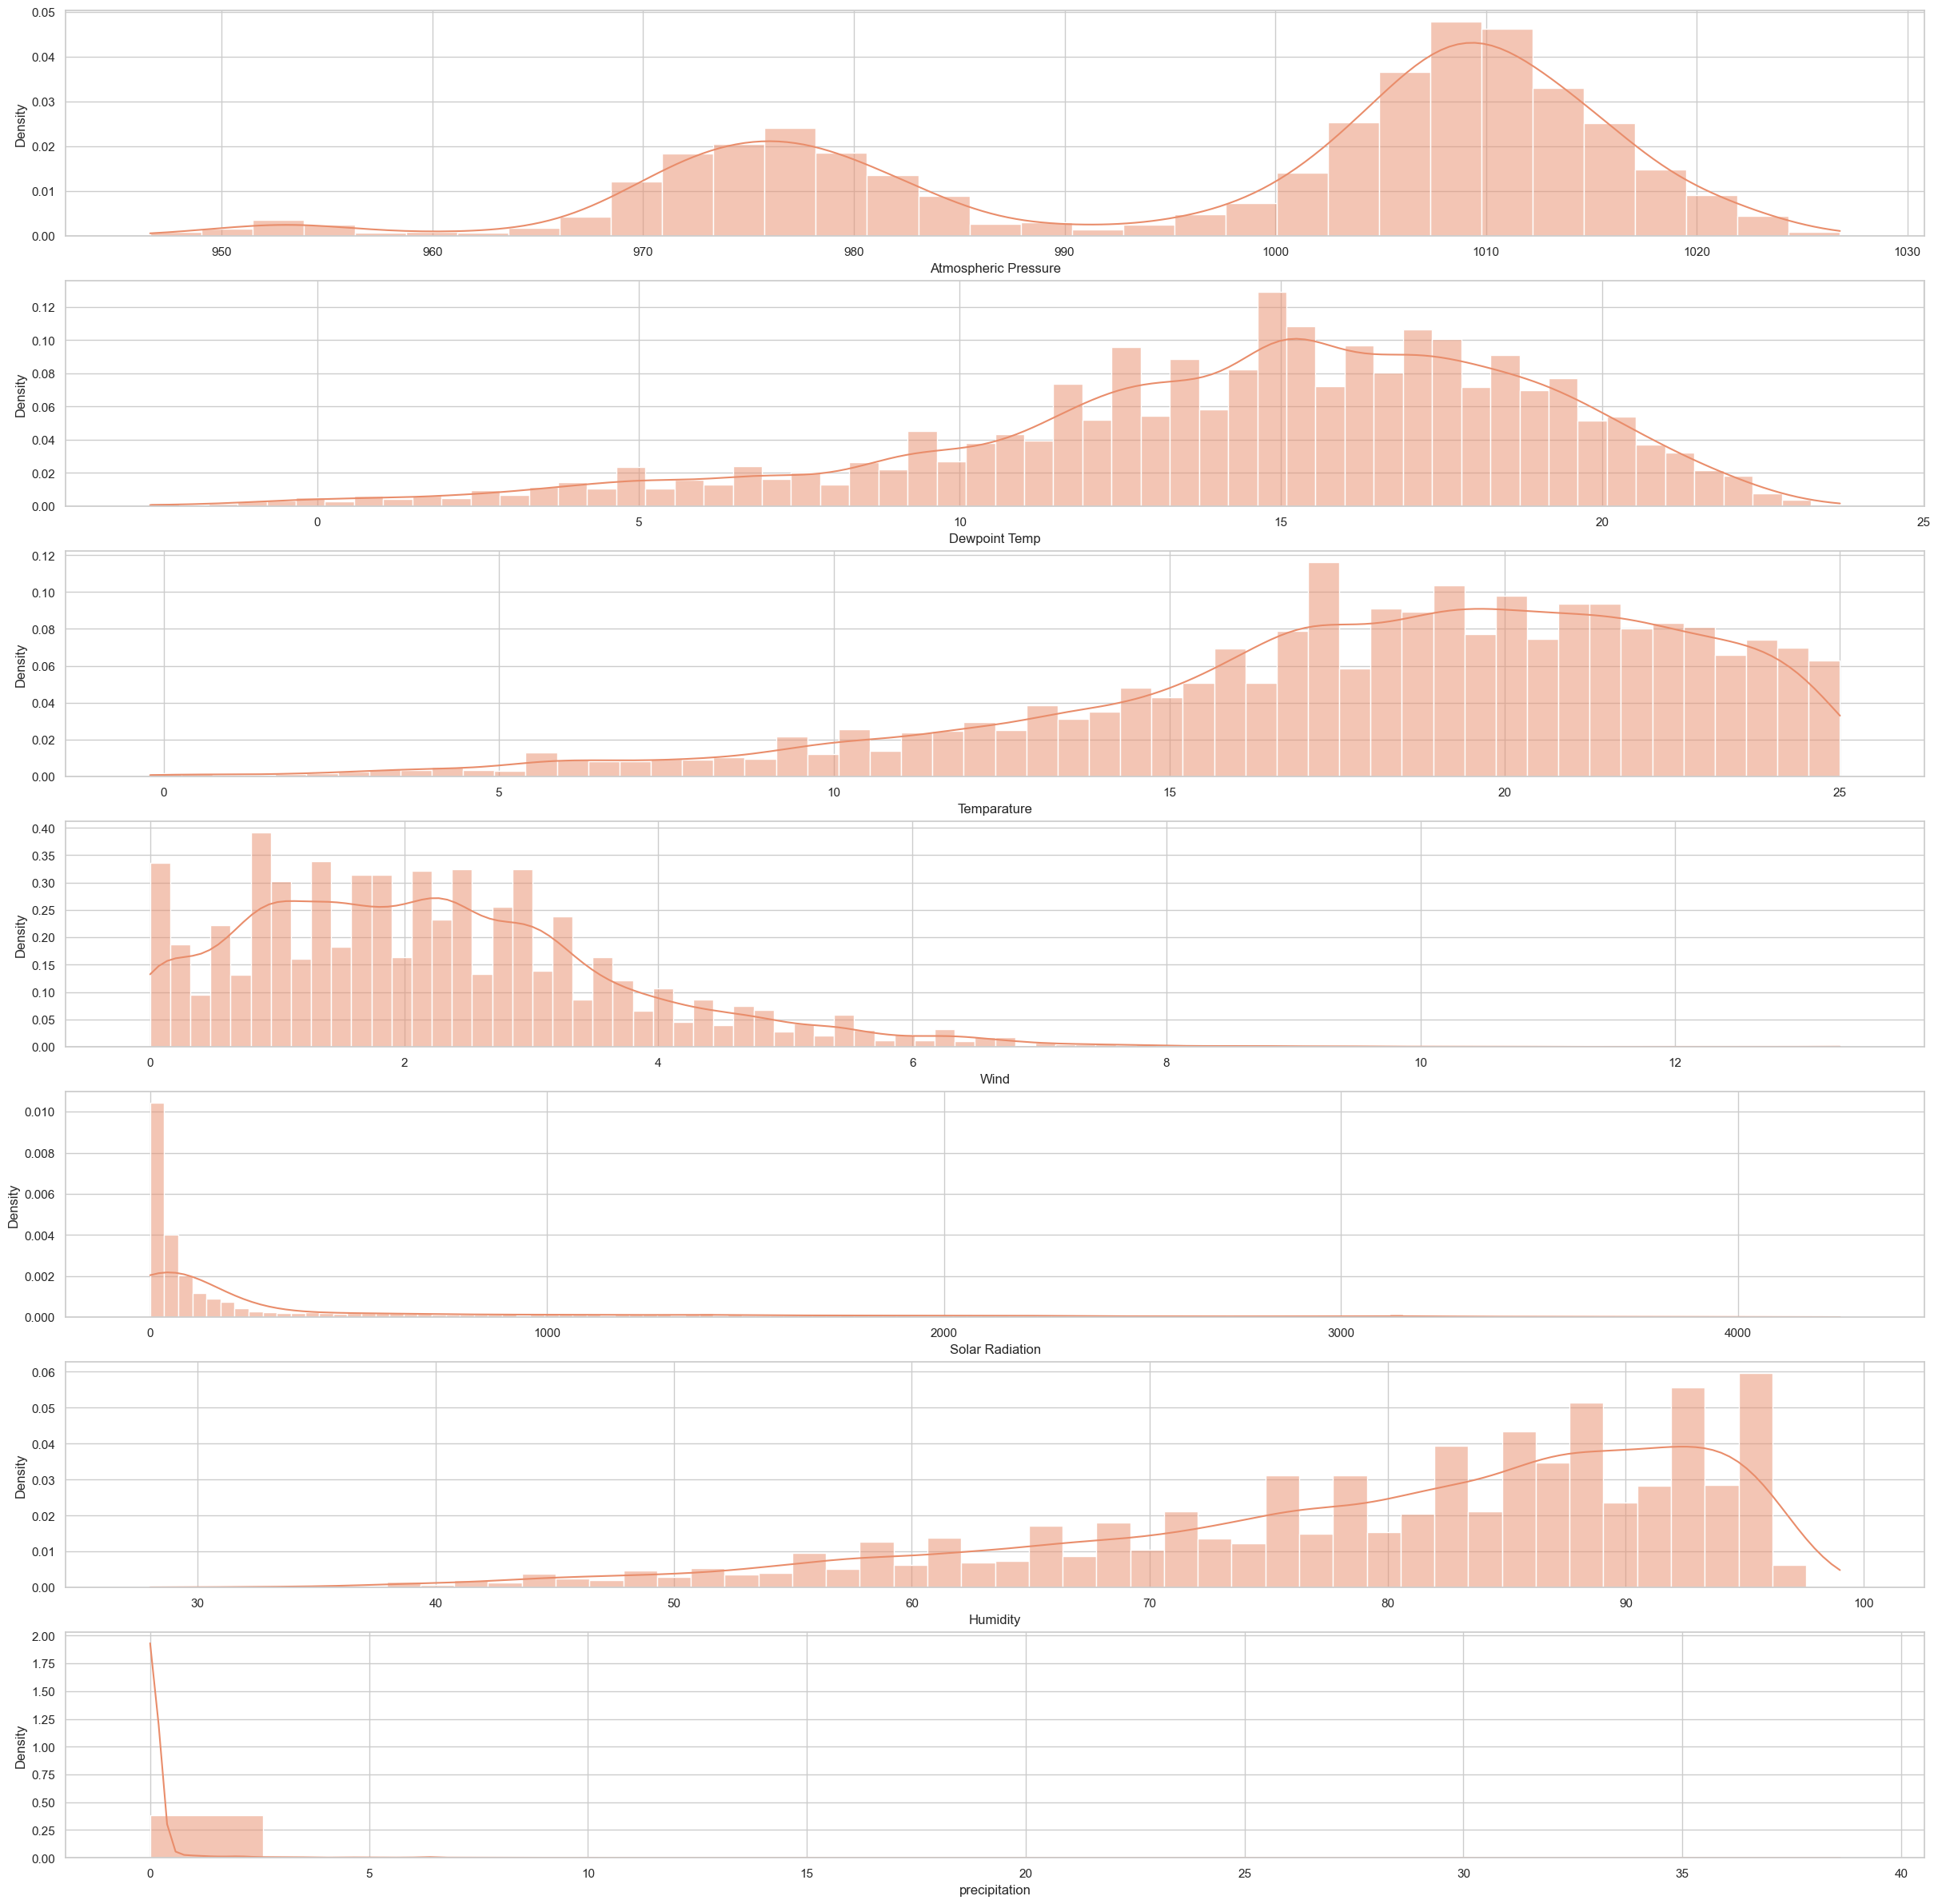

In [17]:
figure, ax = plt.subplots(7, 1, figsize=(30, 30))
sns.set_theme(style='whitegrid', palette='flare')

stp = sns.histplot(cond_sample.stp, ax=ax[0,], kde=True, stat='density')
stp.set(xlabel='Atmospheric Pressure')

dewp = sns.histplot(cond_sample.dewp, ax=ax[1, ], kde=True, stat='density')
dewp.set(xlabel='Dewpoint Temp')

temp = sns.histplot(cond_sample.temp, ax=ax[2, ], kde=True, stat='density')
temp.set(xlabel='Temparature')

wdsp = sns.histplot(cond_sample.wdsp, ax=ax[3, ], kde=True, stat='density')
wdsp.set(xlabel='Wind')

gbrd = sns.histplot(cond_sample.gbrd, ax=ax[4, ], kde=True, stat='density')
gbrd.set(xlabel='Solar Radiation')

hmdy = sns.histplot(cond_sample.hmdy, ax=ax[5, ], kde=True, stat='density')
hmdy.set(xlabel='Humidity')

prcp = sns.histplot(cond_sample.prcp, ax=ax[6, ], kde=True, stat='density')
prcp.set(xlabel='precipitation')

plt.show()

In [18]:
cond_sample.mean()

stp     997.894664
dewp     14.440144
hmdy     80.207235
wdsp      2.231501
gbrd    460.555128
prcp      0.209270
temp     18.127567
dtype: float64

In [19]:
cond_sample.var()

stp        313.762427
dewp        21.240566
hmdy       169.516867
wdsp         2.283579
gbrd    656716.456333
prcp         1.769730
temp        21.561472
dtype: float64

### Task 4
An estimation of pair correlation coefficients, confidence intervals for them and significance levels.

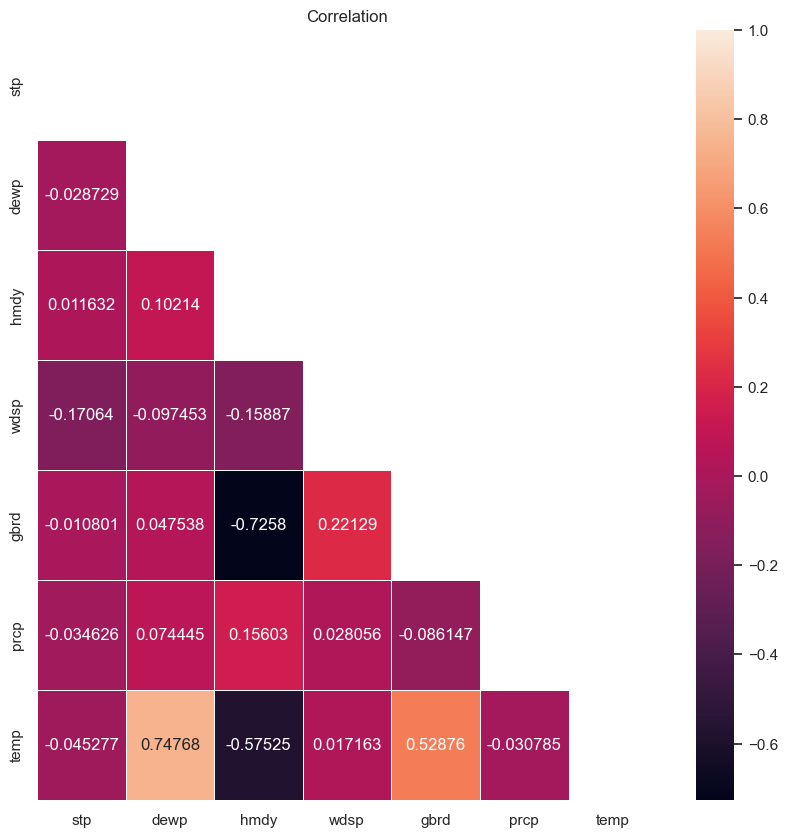

In [36]:
figure, ax = plt.subplots(1, 1, figsize=(10, 10))
sns.set_theme(style='whitegrid', palette='flare')

corr = sample.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, annot=True, ax=ax, vmax=1, fmt='.5g', linewidths=.5)

plt.title('Correlation')
plt.show()

In [21]:
def estimate_correlation(x, y):
    return scipy.stats.pearsonr(x, y)
    
def estimate_confidence_intervals(cor, x, y, alpha = 0.05):
    coeff = np.arctanh(cor)

    std = 1/np.sqrt(x.size-3)
    z = scipy.stats.norm.ppf(1-alpha/2)
    return coeff-z*std, coeff+z*std

In [37]:
tab = [["Pair", "Correlation", "Significance level", "Confidence Interval", ""]]
df_cls = ['stp', 'temp', 'dewp', 'hmdy', 'wdsp', 'gbrd', 'prcp']
for i, x_col_name in enumerate(df_cls):
    j = i + 1
    
    if j >= len(df_cls):
        break
        
    for k in range(j, len(df_cls)):
        y_col_name = df_cls[k]
        x = sample[x_col_name]
        y = sample[y_col_name]
        
        cor, p = estimate_correlation(x, y)
        
        low, high = estimate_confidence_intervals(cor, x, y)
        tab.append([f'{x_col_name} - {y_col_name}',round(cor,3),round(p, 7),round(low,3),round(high,3)])
print(tabulate(tab, headers="firstrow", tablefmt="grid"))

+-------------+---------------+----------------------+-----------------------+--------+
| Pair        |   Correlation |   Significance level |   Confidence Interval |        |
+=============+===============+======================+=======================+========+
| stp - temp  |        -0.045 |            0         |                -0.059 | -0.031 |
+-------------+---------------+----------------------+-----------------------+--------+
| stp - dewp  |        -0.029 |            4.86e-05  |                -0.043 | -0.015 |
+-------------+---------------+----------------------+-----------------------+--------+
| stp - hmdy  |         0.012 |            0.100063  |                -0.002 |  0.025 |
+-------------+---------------+----------------------+-----------------------+--------+
| stp - wdsp  |        -0.171 |            0         |                -0.186 | -0.158 |
+-------------+---------------+----------------------+-----------------------+--------+
| stp - gbrd  |        -0.011 | 

### Task 5
Multivariate correlation (target - predictors).

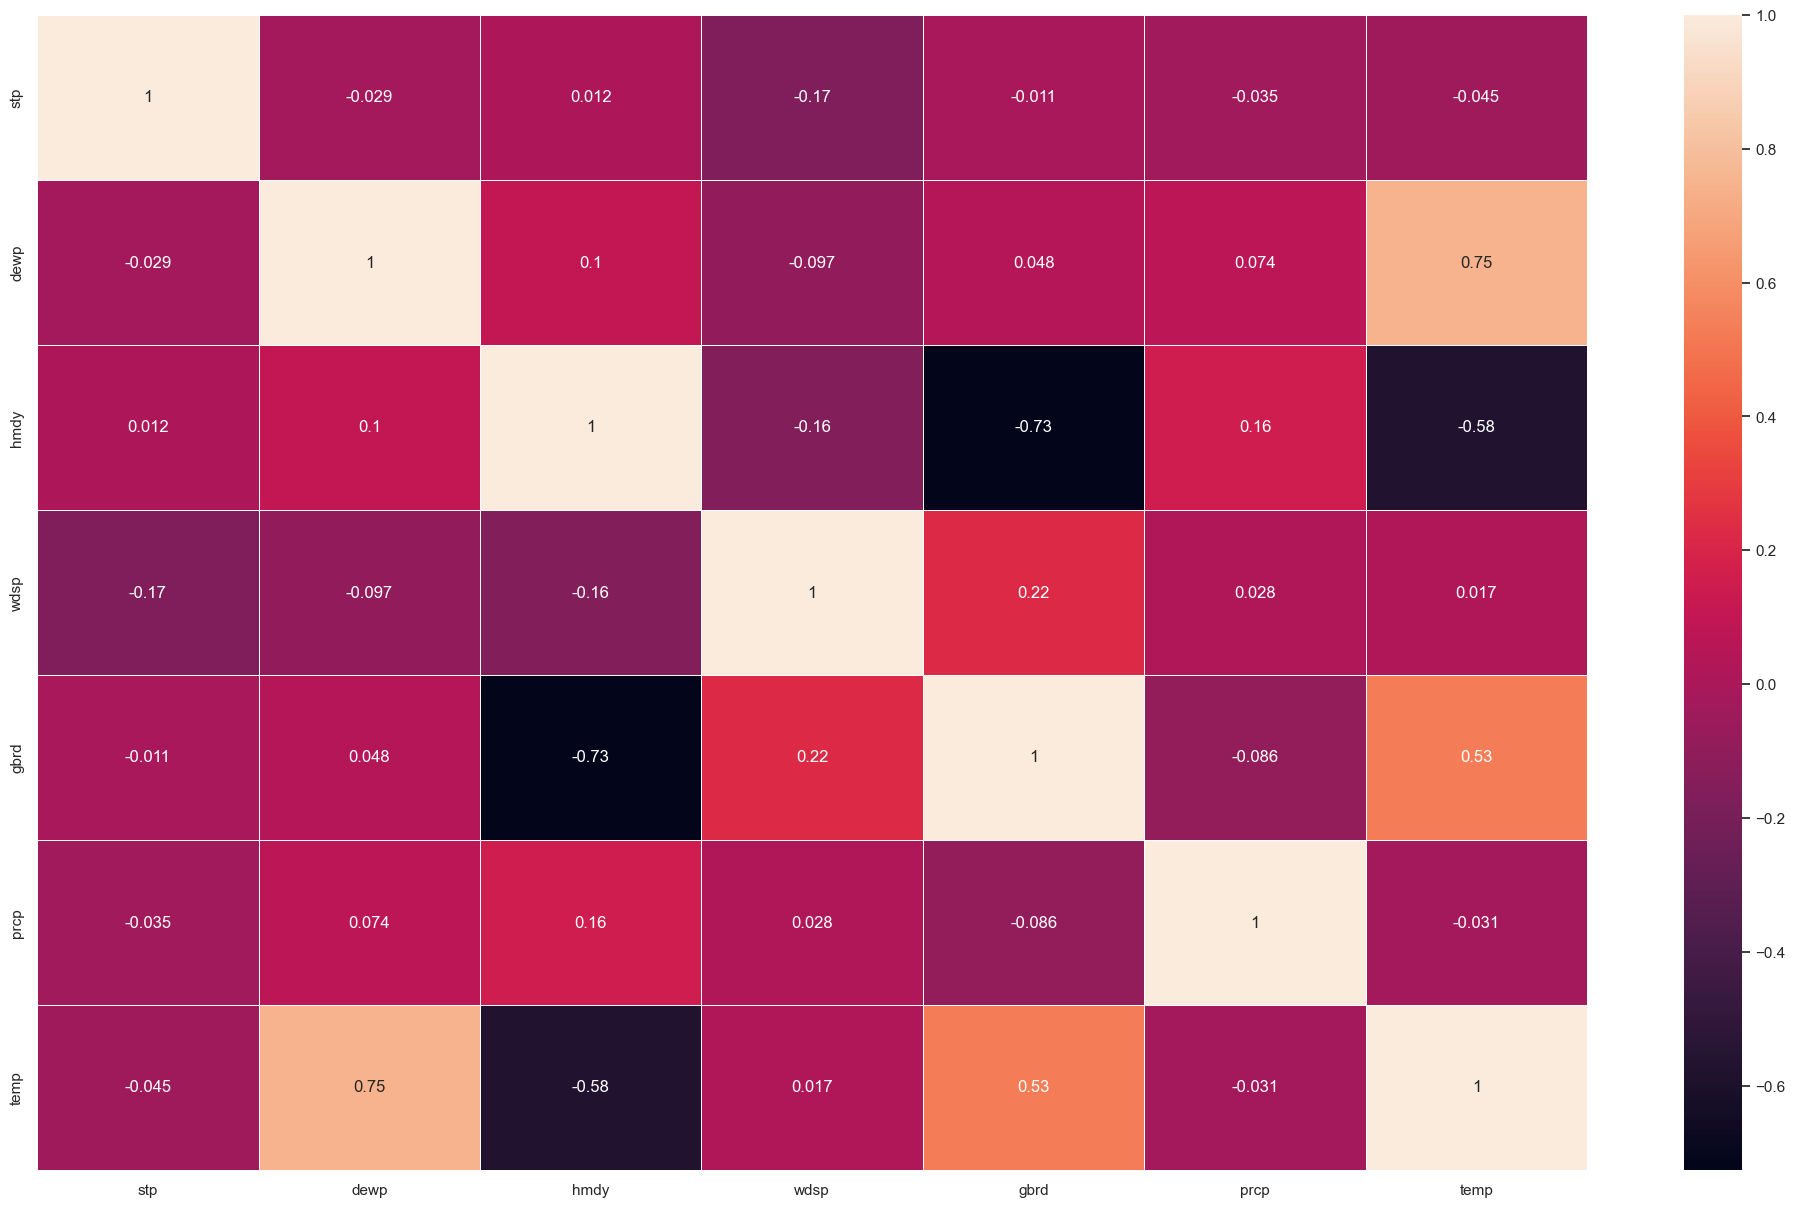

In [23]:
plt.subplots(figsize=(25, 15))
g = sns.heatmap(sample.corr(), annot=True, linewidths=0.5)

In [100]:
scaled_sample = scale(sample)
scaled_sample = pd.DataFrame(scaled_sample, index=sample.index, columns=sample.columns)

In [101]:
scaled_sample.head()

,stp,dewp,hmdy,wdsp,gbrd,prcp,temp
10,1.047778,-0.669098,0.642949,-0.292482,-0.635830,-0.148167,-0.965714
11,1.081095,-0.562523,0.517141,-0.020599,-0.209341,-0.148167,-0.812719
12,1.119965,-0.605153,0.013912,-0.020599,0.787710,-0.148167,-0.591727
13,1.142176,-0.988820,-0.866740,0.047372,1.511884,-0.148167,-0.370734
14,1.114412,-1.628266,-1.684488,-0.428424,2.004207,-0.148167,-0.251738


### Task 6
A regression model and an analysis of multicollinearity and regularization (if needed).

In [118]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [119]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(scaled_sample[['stp','dewp','hmdy','wdsp','gbrd','prcp']], scaled_sample['temp'])

In [122]:
import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train)

lr_m = sm.OLS(y_train, X_train_lm).fit()

lr_m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   temp   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                 2.212e+05
Date:                Mon, 21 Nov 2022   Prob (F-statistic):               0.00
Time:                        13:06:51   Log-Likelihood:                 12426.
No. Observations:               14992   AIC:                        -2.484e+04
Df Residuals:                   14985   BIC:                        -2.478e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       9.249e-05      0.001      0.107      0.915      -0.002       0.002
stp           -0.0166      0.001    -18.859      0.000      -0.018      -0.015
dewp           0.8086      0.001    907.223      0.000       0.807       0.810
hmdy          -0.6404      0.001   -496.467      0.000      -0.643      -0.638
wdsp          -0.0154      0.001    -16.939      0.000      -0.017      -0.014
gbrd           0.0300      0.001     23.214      0.000       0.027       0.033
prcp           0.0111      0.001     12.937      0.000       0.009       0.013
==============================================================================
Omnibus:                     9080.548   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           161791.661
Skew:                           2.586   Prob(JB):                         0.00
Kurtosis:                      18.240   Cond. No.                         2.72
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [123]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,gbrd,2.27
2,hmdy,2.25
3,wdsp,1.10
1,dewp,1.07
0,stp,1.04
5,prcp,1.03


In [124]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Mean Absolute Error: {:.3f}'.format(mae))
print('Mean Squared Error: {:.3f}'.format(mse))
print('R2 Score: {:.3f}'.format(r2))

Mean Absolute Error: 0.072
Mean Squared Error: 0.011
R2 Score: 0.989


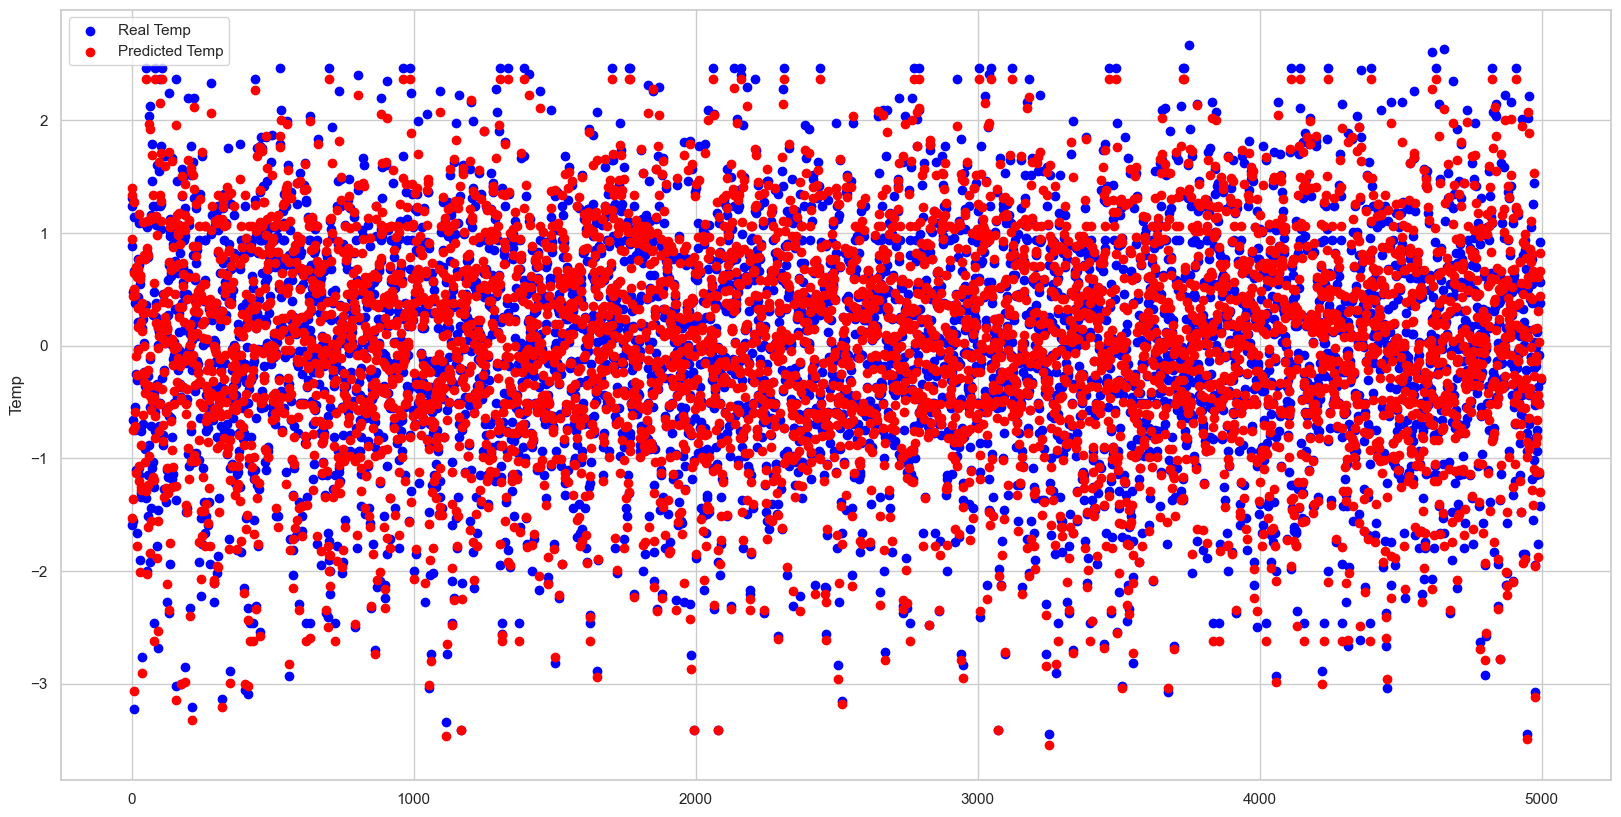

In [125]:
f, ax = plt.subplots(figsize=(20, 10))
plt.scatter(range(X_test.shape[0]), y_test, label = 'Real Temp', alpha=1, color='b')
plt.scatter(range(X_test.shape[0]), y_pred, label = 'Predicted Temp', alpha=1, color='r')
plt.legend()
plt.ylabel('Temp')
plt.show()

### Task 7
Quality analysis of regression model (distribution of residuals, determination coefficient).

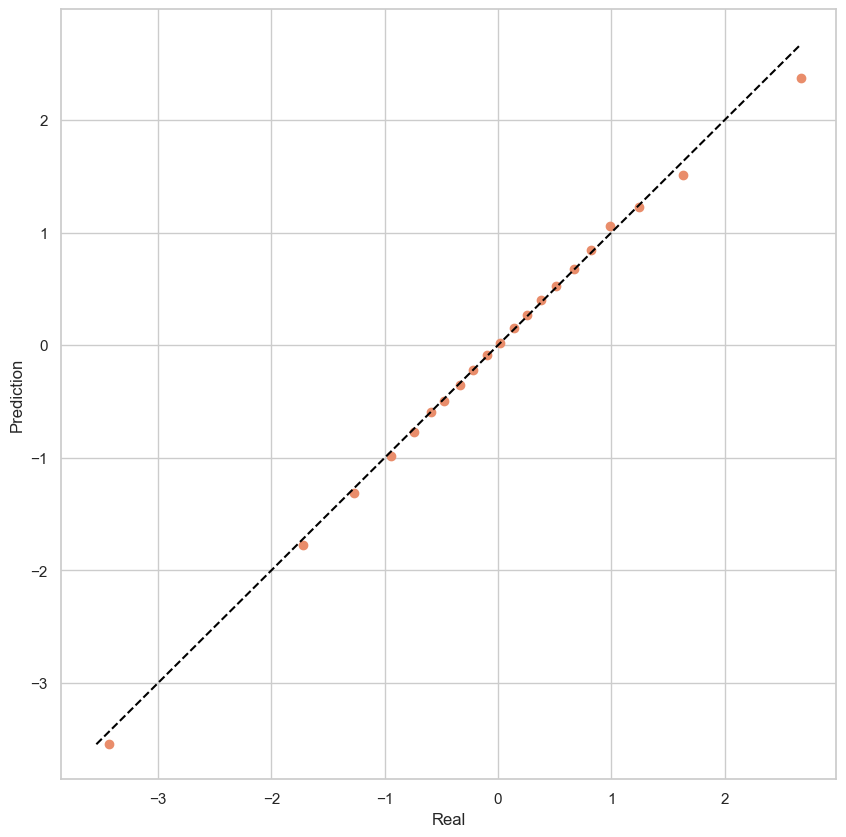

In [126]:
percs = np.linspace(0, 100, 21)
qn_first = np.percentile(y_train, percs)
qn_second = np.percentile(y_pred, percs)
plt.figure(figsize=(10, 10))

min_qn = np.min([qn_first.min(), qn_second.min()])
max_qn = np.max([qn_first.max(), qn_second.max()])
x = np.linspace(min_qn, max_qn)

plt.plot(qn_first, qn_second, ls="", marker="o", markersize=6)
plt.plot(x, x, color="k", ls="--")

plt.xlabel(u'Real')
plt.ylabel(u'Prediction')
plt.show()

<AxesSubplot:ylabel='Density'>

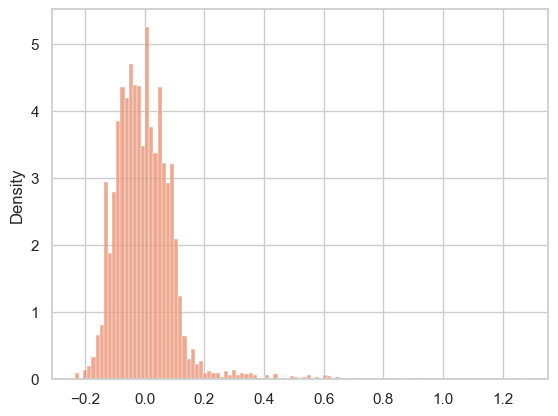

In [127]:
residuals = y_test[:].to_numpy().reshape(-1) - y_pred[:].reshape(-1)

sns.histplot(residuals, stat="density")

In [128]:
mu, std = scipy.stats.norm.fit(residuals)
mu, std

(-0.0003699071277693782, 0.1034871478795093)

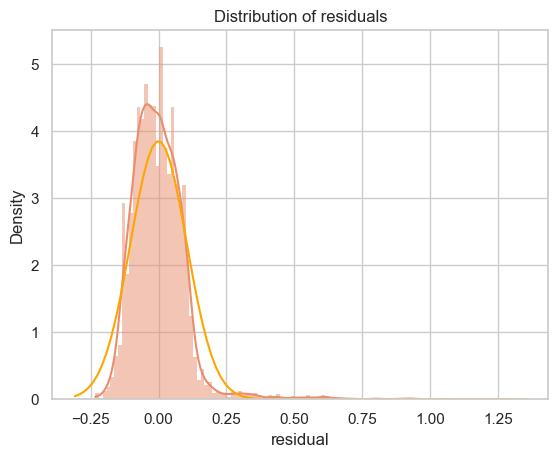

In [129]:
fig, ax = plt.subplots()

sns.histplot(x=residuals, ax=ax, stat="density", linewidth=0, kde=True)
ax.set(title="Distribution of residuals", xlabel="residual")

# plot corresponding normal curve
xmin, xmax = plt.xlim() # the maximum x values from the histogram above
x = np.linspace(xmin, xmax, 100) # generate some x values
p = scipy.stats.norm.pdf(x, mu, std) # calculate the y values for the normal curve
sns.lineplot(x=x, y=p, color="orange", ax=ax)
plt.show()

In [45]:
sample.plot_diagnostics(figsize=(15,12))
plt.show()

AttributeError: 'DataFrame' object has no attribute 'plot_diagnostics'